- La présentation et les commentaires compteront pour une partie importante de la note.
- Nous nous attendons à ce que vous soyez capables d'étudier des données en utilisant les méthodes vues en TP.  
- Vous avez droit à toutes les ressources sur cette plateforme ou en ligne.   
- Pensez à bien enregistrer puis __télécharger__ très régulièrement votre notebook, au cas où la plateforme vous déconnecte.

## Enoncé

### Partie 1: _(15 points)_

L'ensemble de données contient des mesures sur la composition de 10 marques de pizza. Les variables de l'ensemble de données sont:

* brand - Marque de pizza 
* id - Échantillon analysé
* mois - Quantité d'eau pour 100 grammes dans l'échantillon
* prot - Quantité de protéines pour 100 grammes dans l'échantillon
* fat - Quantité de matières grasses pour 100 grammes dans l'échantillon
* ash - Quantité de cendres pour 100 grammes dans l'échantillon
* sodium - Quantité de sodium pour 100 grammes dans l'échantillon
* carb - Quantité de glucides pour 100 grammes dans l'échantillon
* cal - Quantité de calories pour 100 grammes dans l'échantillon


__1. Extraire les colonnes correspondant aux mesures ainsi que la variable catégorielle.__

__2. Effectuer une ACP de ces données. Que suggèrent les metriques par rappport au nombre de composantes à retenir ?__

__3. En premier lieu, on prendra les deux premières composantes principales et on soignera les représentations graphiques. Le modèle est t-il représentatif?__

__4. Effectuer une CAH pour afficher le dendogramme.__

__5. Comparer avec une méthode K-means.__

__6. Peut-on dire que la classification est bonne comparée au numéro de marque de pizza donné? (En d'autres termes, vérifier si les pizza appartenant à la même marque sont regroupées dans une même classe).__

__7. Est-il judicieux d'exclure un groupe et de refaire une ACP? Justifier et l'effectuer si besoin.__

_Remarque: pour la classification, nous ne cherchons pas à retrouver autant de classes que le nombre de marques de pizza donné._

### Partie 2: _(5 points)_

Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales indiens. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est prédisposé au diabète ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées à la sélection de ces cas à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne.

L'ensemble de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. L'ensemble des variables est décrit comme suit:

* NBG - Nombre de grossesses

* GC - Concentration de glucose plasmatique 

* TD - Tension artérielle diastolique

* EPC - Épaisseur de pli cutané tricipitale

* IS - Insuline sérique  
 
* IMC - Indice de masse corporelle

* DG - La fonction de l'arbre généalogique du diabète (une fonction qui évalue la probabilité de diabète sur la base des antécédents familiaux)

* AGE - L'age

* RESULTAT - La variable de classe (1 si l'individu est prédisposé au diabète, 0 sinon)


__1. Créer un réseau de neurones permettant de prédire si une patiente est prédisposée au diabète ou non. En premier lieu suggérer le votre, puis utiliser le modèle proposé et comparer.__

__2. Evaluer votre modèle ainsi que modèle proposé sur les données test. Commenter.__


__Indication:__

_Commencer par extraire un jeu de test au préalable représentant 20% de la taille de la base de données:_

 x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


# Partie 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import scatter_matrix

In [6]:
data1 = pd.read_csv('Pizza.csv')
data1.head(2)

brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84

In [10]:
# On stock dans une variable les données quantitatives
var = data1.iloc[:,2:9]
var.head(3)

mois   prot    fat   ash  sodium  carb   cal
0  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2  28.35  19.99  45.78  5.08    1.63  0.80  4.95

In [11]:
# On stock dans une variable les données categorielles
categorielles = data1.iloc[:,0:1]
categorielles.head(2)

brand
0     A
1     A

In [12]:
# On centre et on réduit les valeurs/données quantitatives
x = var.values
x = StandardScaler().fit_transform(x)
x

array([[-1.37181459,  1.25418127,  2.74984143, ...,  2.97668662,
        -1.22751105,  2.68012924],
       [-1.30156227,  1.22771661,  2.64047481, ...,  3.03077869,
        -1.21362189,  2.53473344],
       [-1.31624186,  1.03000998,  2.85139615, ...,  2.59804213,
        -1.22584435,  2.71243942],
       ...,
       [ 0.3823963 , -0.36794707, -0.46866201, ..., -0.07951534,
         0.1730719 , -0.56704362],
       [ 0.70220164, -0.45823828, -0.56352082, ..., -0.29588362,
         0.08918137, -0.82552504],
       [ 0.62251244, -0.53918903, -0.52780927, ..., -0.26883759,
         0.14529358, -0.7447496 ]])

In [21]:
# Instanciation pour l'ACP
acp = sklearnPCA(svd_solver='full')
coord = acp.fit_transform(x)

# Nombres de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

7


In [22]:
# Valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(x)-1)/len(x) #ajustement suite à la version 0.2
print(eigval)

[4.17178190e+00 2.29045739e+00 4.14562342e-01 9.51742273e-02
 2.76770181e-02 3.37609355e-04 9.51878034e-06]


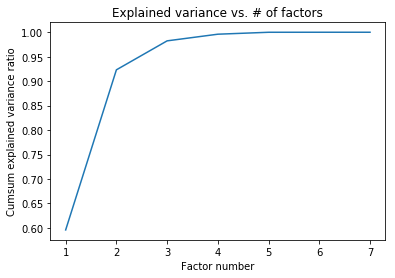

In [16]:
# Cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

En utilisant le critère du coude on retient les deux premières composantes


# Question 3

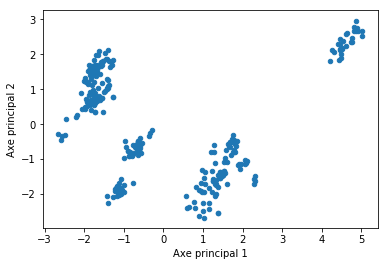

In [17]:
# On effectue une ACP sur ces valeurs
pca = sklearnPCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
finaldf = pd.concat([principaldf, data1.iloc[:,0:1]], axis = 1)
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [18]:
# Nombre de marque de pizza unique pour savoir le nombre de couleurs a mettre
data1.brand.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

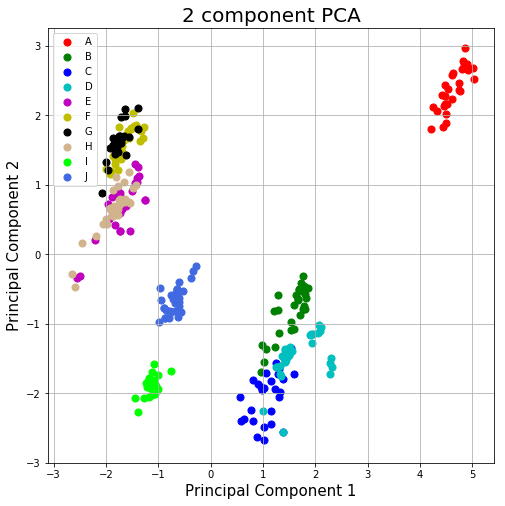

In [19]:
# Visualisation de la répartition de chaque pizza en fonction des composantes 1 et 2 avec des couleurs pour les chaque marque
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'tan', 'lime', 'royalblue']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['brand'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [25]:
#contribution des individus dans l'inertie totale
di = np.sum(x**2,axis=1)

#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data1.id,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))



        id    COS2_1    COS2_2
0    14069  0.775166  0.221654
1    14053  0.793240  0.201070
2    14025  0.763141  0.236246
3    14016  0.791285  0.206819
4    14005  0.807292  0.188198
5    14075  0.809216  0.187422
6    14082  0.812318  0.184578
7    14097  0.794864  0.194423
8    14117  0.765258  0.233433
9    14133  0.773565  0.226193
10   14101  0.756748  0.241828
11   14108  0.760368  0.239033
12   14164  0.760472  0.237973
13   14154  0.784961  0.210871
14   24005  0.812924  0.185352
15   24026  0.776918  0.209289
16   24094  0.841775  0.142414
17   24108  0.828656  0.152307
18   24102  0.842563  0.148214
19   24082  0.801259  0.188545
20   34017  0.726831  0.271077
21   34020  0.748778  0.250015
22   24136  0.812044  0.185997
23   24122  0.795698  0.198451
24   24115  0.816775  0.165006
25   34012  0.782608  0.214938
26   34006  0.757397  0.240218
27   24146  0.768395  0.227940
28   24138  0.800002  0.197615
29   14015  0.711744  0.048507
..     ...       ...       ...
270  140

In [26]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((7,7))
for k in range(7):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 1.32168508e-01 -9.50848850e-01 -2.71497942e-01 -6.80933161e-02
  -1.07642463e-03  8.20313706e-03  1.29139098e-03]
 [ 7.73616888e-01 -4.08180979e-01  4.80341077e-01 -3.26803560e-03
  -6.45464124e-02 -3.15153954e-06  8.53888687e-04]
 [ 9.12312469e-01  3.54715333e-01 -1.28327937e-01 -1.56424131e-01
   2.88421527e-02 -9.65383064e-03  1.16521186e-03]
 [ 9.63831544e-01 -1.67975751e-01  3.62320221e-02  1.70416723e-01
   1.11611305e-01  1.08151947e-03  1.72840141e-04]
 [ 8.89920550e-01  3.05199930e-01 -2.93067379e-01  1.37677851e-01
  -1.00253357e-01  5.75291885e-05 -1.61767114e-06]
 [-8.67883723e-01  4.84768536e-01  3.36332661e-02  1.03144801e-01
   1.23723308e-03 -9.34975052e-06  2.39436513e-03]
 [ 4.99363860e-01  8.58804861e-01  7.29599592e-02 -8.61535778e-02
   1.29769290e-02  1.32645528e-02  3.72075533e-05]]


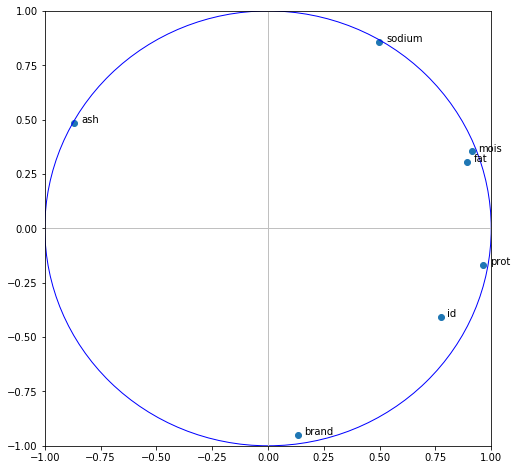

In [24]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(7):
     plt.annotate(data1.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

# Partie 2

In [4]:
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split

#La fonction pour récupérer l'indice du maximum d'une liste
def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

In [5]:
data2 = pd.read_excel('dataset.xlsx')
data2.head(2)

NBG   GC  TD  EPC  IS   IMC     DG  AGE  RESULTAT
0    6  148  72   35   0  33.6  0.627   50         1
1    1   85  66   29   0  26.6  0.351   31         0

### Utiliser ce modèle et comparer

In [7]:
# model creation
model = tf.keras.models.Sequential()
# Add the layers
model.add(tf.keras.layers.Dense(12, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)